# pre-lab

In [ ]:
import numpy as np

sw=5*np.cov( np.array([[1,2], [2,3], [3,3], [4,5], [5,5]]).T)+6*np.cov( np.array( [[1,0], [2,1], [3,1], [3,2], [5,3], [6,5]]).T)

mx=np.mean(np.array([[1,2], [2,3], [3,3], [4,5], [5,5]]),axis=0)
my=np.mean(np.array( [[1,0], [2,1], [3,1], [3,2], [5,3], [6,5]]),axis=0)
m=(5*mx+6*my)/11
np.asmatrix(mx-m).T*np.asmatrix(mx-m)
sb=5* np.asmatrix(mx-m).T*np.asmatrix(mx-m) + 6* np.asmatrix(my-m).T*np.asmatrix(my-m)

print(np.linalg.inv(sw)*sb)
print(np.linalg.eig(np.linalg.inv(sw)*sb))
print('class1 projection <0',np.asmatrix([ 0.6650795,-0.74677256])*np.array([[1,2], [2,3], [3,3], [4,5], [5,5]]).T)
print('class2 projection >0',np.asmatrix([ 0.6650795,-0.74677256])*np.array([[1,0], [2,1], [3,1], [3,2], [5,3], [6,5]]).T)

[[ 0.59035156 -2.83368749]
 [-0.66286564  3.18175507]]
(array([-4.44089210e-16,  3.77210663e+00]), matrix([[-0.97898042,  0.6650795 ],
        [-0.20395425, -0.74677256]]))
class1 projection <0 [[-0.82846562 -0.91015868 -0.24507918 -1.0735448  -0.4084653 ]]
class2 projection >0 [[0.6650795  0.58338644 1.24846594 0.50169338 1.08507982 0.2566142 ]]


# part1

$$ argmax_{u_1} \frac{u^Ts_bu}{u^Ts_wu} ->  \frac{d \frac{u^Ts_bu}{u^Ts_wu}}{du}= \frac{2s_bu(u^Ts_wu) - 2s_wu(u^Ts_bu)}{(u^Ts_wu)^2}=0$$
$$ -> s_bu(u^Ts_wu) =s_wu(u^Ts_bu) -> (s_w)^{-1}s_bu (u^Ts_wu) =u (u^Ts_bu)$$
$$ (s_w)^{-1}s_b u = u \frac{(u^Ts_bu)}{(u^Ts_wu)} $$

از تابع هدف نسبت به یو مشتق گرفته و برابر صفر می گذاریم. با ساده سازی به عبارت اخیر می رسیم که از آن نتیجه می شود  بردار یو بردار ویژه ماتریس 
$ (s_w)^{-1}s_b $
با مقدار ویژه 
$ \frac{(u^Ts_bu)}{(u^Ts_wu)} $
خواهد بود.

# part2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


در این بخش، تصاویر از فولدرهای خوشحال و متعجب خوانده می شوند. هر تصویر به بردار تبدیل شده و به همراه برچسب آن ذخیره می شود

In [ ]:
#reading images with 2 label (happy,surprise)
dataPath1 = 'drive/My Drive/ml/Cohn-Kanade/surprise'
dataPath2 = 'drive/My Drive/ml/Cohn-Kanade/happy'

#dataPath1 = 'drive/My Drive/CVLab/LAB1/Data/Cohn-Kanade/surprise'
#dataPath2 = 'drive/My Drive/CVLab/LAB1/Data/Cohn-Kanade/happy'

data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   

datah = []
labelh = []

datas = []
labels = []

for file in os.listdir(dataPath1):
        if file[-3:] in {'jpg', 'png'}:
              im = imread(dataPath1 +'/' + file,0) # read image
              data['label'].append('surprise')
              data['filename'].append(file)
              data['data'].append((im.reshape(im.shape[0]*im.shape[1])))

              datas.append((im.reshape(im.shape[0]*im.shape[1])))
              labels.append('surprise')
                    
for file in os.listdir(dataPath2):
        if file[-3:] in {'jpg', 'png'}:
              im = imread(dataPath2 +'/' + file,0) # read image
              data['label'].append('happy')
              data['filename'].append(file)
              data['data'].append((im.reshape(im.shape[0]*im.shape[1])))

              datah.append((im.reshape(im.shape[0]*im.shape[1])))
              labelh.append('happy')

در این قسمت از هر کدام از مجموعه داده های خوشحال و متعجب، ۵۰ داده به صورت رندم به عنوان داده های آموزش و مابقی به عنوان داده های تست جدامی شوند.

In [ ]:
#spliting test and train data 
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(datah, labelh ,train_size=50,random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(datas, labels ,train_size=50,random_state=42)

X_train = X_train_h + X_train_s
X_test  = X_test_h  + X_test_s
y_train = y_train_h + y_train_s
y_test  = y_test_h  + y_test_s

در این قسمت، الگوریتم پی سی ای با ۳۰  مولفه اساسی روی داده های آموزش ترین می شود و با استفاده از آن داده های آموزش و تست کاهش بعد داده می شوند.

In [ ]:
pca = PCA(n_components=30)
pca.fit(X_train)
X_reduced_train=(pca.transform(X_train))
X_reduced_test=(pca.transform(X_test))
print('Shape of the reduced train data: ', np.shape(X_reduced_train))

Shape of the reduced train data:  (100, 30)


In [ ]:
print('Shape of the reduced train data with surprise label: ', np.shape(X_reduced_train[np.where(np.array(y_train)=='surprise')]) )

Shape of the reduced train data with surprise label:  (50, 30)


در این قسمت، داده های کاهش بعد داده شده کلاس ها از هم جدا می شوند. پس از آن، مطابق روابط داده شده در دستور کار، ماتریس های پراکندگی داخلی و بینابینی بین کلاس ها محاسبه می شوند.

In [ ]:
X_reduced_train_surprise=X_reduced_train[np.where(np.array(y_train)=='surprise')]
X_reduced_train_happy=X_reduced_train[np.where(np.array(y_train)=='happy')]
X_reduced_test_surprise=X_reduced_test[np.where(np.array(y_test)=='surprise')]
X_reduced_test_happy=X_reduced_test[np.where(np.array(y_test)=='happy')]

# number data in each class
N_happy=np.shape(X_reduced_train[np.where(np.array(y_train)=='happy')])[0]
N_surprise=np.shape(X_reduced_train[np.where(np.array(y_train)=='surprise')])[0]

# compute within class covariance
sw=N_happy*np.cov(X_reduced_train_happy.T) + N_surprise*np.cov(X_reduced_train_surprise.T)

#compute between class covariance
m_surprise=np.mean(X_reduced_train_surprise,axis=0)
m_happy=np.mean(X_reduced_train_happy,axis=0)
m=(N_happy*m_happy+N_surprise*m_surprise)/(N_surprise+N_happy)
sb=N_surprise* np.asmatrix(m_surprise-m).T*np.asmatrix(m_surprise-m) + N_happy* np.asmatrix(m_happy-m).T*np.asmatrix(m_happy-m)
print('sb rank, number of eigen vectors, :',np.linalg.matrix_rank(sw))

sb rank, number of eigen vectors, : 30


# part3

در این قسمت، مقادیر ویژه ماتریس نهایی به دست می آید، همانطور که میبینم، این ماتریس تنها یک مقدار ویژه قابل توجه دارد (که قابل انتظار بود زیرا دو کلاس داریم). بردار ویژه متناظر با این مقدار ویژه نیز به دست می آید. 

[[-0.00263184+0.j]
 [-0.06141105+0.j]
 [ 0.14967916+0.j]
 [-0.18168799+0.j]
 [ 0.02634748+0.j]
 [ 0.31505288+0.j]
 [ 0.54289551+0.j]
 [-0.41545798+0.j]
 [-0.26888869+0.j]
 [ 0.06060462+0.j]
 [ 0.27538494+0.j]
 [-0.14871837+0.j]
 [-0.14332197+0.j]
 [ 0.12011237+0.j]
 [-0.02514154+0.j]
 [ 0.1281366 +0.j]
 [ 0.2160295 +0.j]
 [-0.00863561+0.j]
 [-0.07028756+0.j]
 [ 0.0853781 +0.j]
 [ 0.05008211+0.j]
 [ 0.05625097+0.j]
 [-0.2195884 +0.j]
 [-0.06649473+0.j]
 [ 0.07572689+0.j]
 [ 0.07591082+0.j]
 [-0.10622179+0.j]
 [ 0.01670402+0.j]
 [-0.06029697+0.j]
 [ 0.05988123+0.j]]


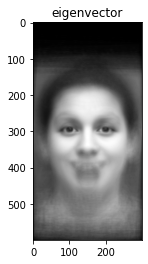

In [ ]:
#finding the only eigen vector and converting to eigenface
sf = np.linalg.inv(sw)*sb
value, vector = np.linalg.eig(sf)
max_value = np.max(value)
max_ind = list(value).index(max_value)
max_vector = vector[:,max_ind]
print(max_vector) 
vector_transformed = (pca.inverse_transform(max_vector.flatten()))
vector_transformed_img = np.real(np.reshape(vector_transformed, (600, 300)))
plt.imshow(vector_transformed_img,cmap='gray')
plt.title('eigenvector')
plt.show()

همان طور که دیده می شود در تصویر متناظر با بردار ویژه به دست آمده، ناحیه های روشن مربوط به چهره خوشحال و ناحیه های تیره مربوط به چهره متعحب هستند.

در قسمت زیر، همه بردارهای تصاویر روی بردار ویژه تصویر می شوند سپس از روی دقت تفکیک پذیری کلاس ها، خطاهای آموزش و تست محاسبه می شوند.

In [ ]:
#project faces on eigenvector and predict labels
weights_surprise_train = X_reduced_train_surprise.dot(max_vector).flatten()
weights_happy_train = X_reduced_train_happy.dot(max_vector).flatten()
weights_surprise_test = X_reduced_test_surprise.dot(max_vector).flatten()
weights_happy_test = X_reduced_test_happy.dot(max_vector).flatten()
ms=np.mean(weights_surprise_train)
mh=np.mean(weights_happy_train)

test_error = np.sum ( np.abs(weights_surprise_test-ms)>np.abs(weights_surprise_test-mh)  ) + np.sum( ( np.abs(weights_happy_test-ms)<np.abs(weights_happy_test-mh))  )
train_error = np.sum ( np.abs(weights_surprise_train-ms)>np.abs(weights_surprise_train-mh)  ) + np.sum( ( np.abs(weights_happy_train-ms)<np.abs(weights_happy_train-mh))  )

In [ ]:
print('Train error of LDA method with 30 components for PCA: ', train_error)
print('Test erorr of LDA method with 30 components for PCA: ', test_error)
print('Train acc for LDA with 30 components: ', 1 - train_error/int(np.shape(y_train)[0]))
print('train acc for LDA =', 1 - test_error/int(np.shape(y_test)[0]))

Train error of LDA method with 30 components for PCA:  0
Test erorr of LDA method with 30 components for PCA:  3
Train acc for LDA with 30 components:  1.0
train acc for LDA = 0.9589041095890412


در قسمت زیر، روش ال دی ای توسط تابع اماده اجرا شده است.

Accuracy of LDA on test data using sklearn:  1.0


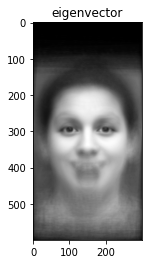

In [ ]:
# lda using sklearn
clf = LinearDiscriminantAnalysis()
clf.fit(X_reduced_train, y_train)
print('Accuracy of LDA on test data using sklearn: ', clf.score(X_reduced_test, y_test))
clf.score(X_reduced_test,y_test)
vector_transformed = (pca.inverse_transform(clf.scalings_.flatten()))
vector_transformed_img = np.real(np.reshape(vector_transformed, (600, 300)))
plt.imshow(vector_transformed_img,cmap='gray')
plt.title('eigenvector')
plt.show()

در قسمت زیر، الگوریتم نیرست نیبر با کا های مختلف روی داده آموزش ترین شده و دقت الگوریتم روی داده های آموزش و تست آورده شده است.

In [ ]:
# k nearest neighbors with different k
for i in [1 , 3 ,5]:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_reduced_train, y_train)
  print('test acc for k=', i, ':, ', neigh.score(X_reduced_test,y_test))
  print('train acc for k=',i,': ',neigh.score(X_reduced_train,y_train))
  print('-------------------------------------------')

test acc for k= 1 :,  0.4520547945205479
train acc for k= 1 :  1.0
-------------------------------------------
test acc for k= 3 :,  0.6712328767123288
train acc for k= 3 :  0.91
-------------------------------------------
test acc for k= 5 :,  0.726027397260274
train acc for k= 5 :  0.91
-------------------------------------------


# part4

در این قسمت، الگوریتم ال دی ای با تعداد مولفه های اساسی متفاوتی برای پی سی ای، ترین و تست می شود. همچنین الگوریتم نزدیک ترین همسایه به ازای کاهای مختلف ترین میشود. دقت این دو الگوریتم به ازای پارامترهای مختلف با یکدیگر مقایسه شده اند.

Train acc for LDA with 10 number of components:  0.91
Test acc for LDA with 10 number of components:  1.0
Train acc of k nearest neighbors for k= 1 :  1.0
Test acc of k nearest neighbors with k= 1 :  0.5753424657534246
Train acc of k nearest neighbors for k= 3 :  0.81
Test acc of k nearest neighbors with k= 3 :  0.6712328767123288
Train acc of k nearest neighbors for k= 5 :  0.84
Test acc of k nearest neighbors with k= 5 :  0.684931506849315
--------------------------------------------------------------------
Train acc for LDA with 30 number of components:  1.0
Test acc for LDA with 30 number of components:  1.0
Train acc of k nearest neighbors for k= 1 :  1.0
Test acc of k nearest neighbors with k= 1 :  0.4520547945205479
Train acc of k nearest neighbors for k= 3 :  0.86
Test acc of k nearest neighbors with k= 3 :  0.6575342465753424
Train acc of k nearest neighbors for k= 5 :  0.84
Test acc of k nearest neighbors with k= 5 :  0.6301369863013698
---------------------------------------

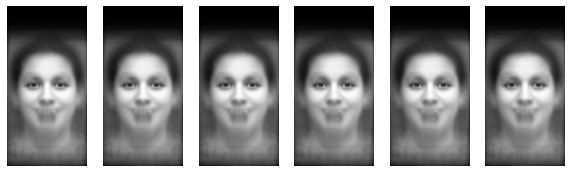

In [ ]:
Ncom=[10 , 30 , 50 , 70 , 90, 99]
fig,ax=plt.subplots(1,len(Ncom),figsize=(10,30))
clf = LinearDiscriminantAnalysis()
for j in range(len(Ncom)):
  pca = PCA(n_components=Ncom[j])
  pca.fit(X_train)
  X_reduced_train=(pca.transform(X_train))
  X_reduced_test=(pca.transform(X_test))
  clf.fit(X_reduced_train, y_train)
  print('Train acc for LDA with', Ncom[j], 'number of components: ' ,clf.score(X_reduced_train, y_train))
  print('Test acc for LDA with', Ncom[j], 'number of components: ' ,clf.score(X_reduced_test, y_test))
  for i in [1 , 3 ,5]:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_reduced_train, y_train)
    print('Train acc of k nearest neighbors for k=',i,': ',neigh.score(X_reduced_train,y_train))
    print('Test acc of k nearest neighbors with k=', i, ': ', neigh.score(X_reduced_test,y_test)) 
  print('--------------------------------------------------------------------')

  vector_transformed = (pca.inverse_transform(clf.scalings_.flatten()))
  vector_transformed_img = np.real(np.reshape(vector_transformed, (600, 300)))
  ax[j].imshow(vector_transformed_img,cmap='gray')
  ax[j].axis('off')
  #print(np.min(vector_transformed_img))
  #print(np.max(vector_transformed_img))

همانطور که دیده می شود عملکرد ال دی ای در همه موارد بهتر است.